We act just like what we do in Q3:
at first, we should open dataset by pandas like before:

In [9]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/My Drive/AI/Assignment1/Assignment 1-Dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now we have dataset here:

In [10]:
dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F86,F87,F88,F89,F90,F91,F92,Target,Unnamed: 93,Unnamed: 94
0,1,7,2,29,2,6,0,0,0,81,...,0,66,6401,4,21.0,0,2,2,NaN,NaN
1,1,28,0,42,2,4,0,0,0,14,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
2,1,7,0,42,2,4,0,0,0,10,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
3,1,28,0,42,2,4,0,0,0,11,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
4,2,7,0,42,2,6,0,0,0,13,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111299,1,2,0,26,2,6,0,0,0,3,...,36,63,3454,0,18.0,36,1,2,NaN,NaN
111300,2,6,0,26,2,8,0,0,0,3,...,60,61,1404,0,0.0,60,1,2,NaN,NaN
111301,1,38,0,26,2,4,0,0,0,3,...,60,61,1404,0,0.0,60,1,2,NaN,NaN
111302,2,6,0,297,2,6,0,0,0,3,...,60,61,1404,0,0.0,60,1,2,NaN,NaN


Let's clean dataset( delete nan columns, split it, scale it):

In [11]:
dataset = dataset.drop(columns=['Unnamed: 93', 'Unnamed: 94'])

y = dataset['Target']  # Target
X = dataset.drop(columns=['Target'])  # Features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)



Now we have main samples and it's time to apply SMOTE to build new classes and the scale their features:

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

scaler = MinMaxScaler()
X_smote = scaler.fit_transform(X_smote)


check our data

In [13]:
# X.shape()

In [14]:
import tensorflow.keras as k

## **AdaGrad Model**

In [15]:
model_AdaGrad = k.models.Sequential()

model_AdaGrad.add(k.layers.Dense(64, activation='relu', input_shape=(92,)))
model_AdaGrad.add(k.layers.BatchNormalization())
model_AdaGrad.add(k.layers.Dropout(0.2))

model_AdaGrad.add(k.layers.Dense(64, activation='relu'))
model_AdaGrad.add(k.layers.BatchNormalization())
model_AdaGrad.add(k.layers.Dropout(0.3))

model_AdaGrad.add(k.layers.Dense(64, activation='relu'))
model_AdaGrad.add(k.layers.BatchNormalization())
model_AdaGrad.add(k.layers.Dropout(0.2))

model_AdaGrad.add(k.layers.Dense(64, activation='relu'))
model_AdaGrad.add(k.layers.BatchNormalization())
model_AdaGrad.add(k.layers.Dropout(0.2))

model_AdaGrad.add(k.layers.Dense(32, activation='relu'))
model_AdaGrad.add(k.layers.BatchNormalization())
model_AdaGrad.add(k.layers.Dropout(0.3))

# Add the output layer
model_AdaGrad.add(k.layers.Dense(3, activation='softmax'))


In [16]:
model_AdaGrad.compile(optimizer=k.optimizers.Adagrad(learning_rate=0.01, epsilon=1e-8),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
hist_AdaGrad = model_AdaGrad.fit(X_smote, y_smote, epochs=250, batch_size=350, validation_data=(X_validation, y_validation))
loss_AdaGrad, accuracy_AdaGrad = model_AdaGrad.evaluate(X_test, y_test)
print('Our NN accuracy for AdaGrad optimizer is:', accuracy_AdaGrad)

Epoch 1/250
491/491 [==============================] - 8s 12ms/step - loss: 0.9765 - accuracy: 0.5412 - val_loss: 0.8572 - val_accuracy: 0.5246
Epoch 2/250
491/491 [==============================] - 4s 8ms/step - loss: 0.8287 - accuracy: 0.5992 - val_loss: 0.8390 - val_accuracy: 0.5456
Epoch 3/250
491/491 [==============================] - 4s 8ms/step - loss: 0.7995 - accuracy: 0.6173 - val_loss: 0.8211 - val_accuracy: 0.5551
Epoch 4/250
491/491 [==============================] - 5s 11ms/step - loss: 0.7819 - accuracy: 0.6290 - val_loss: 0.8065 - val_accuracy: 0.5627
Epoch 5/250
491/491 [==============================] - 4s 9ms/step - loss: 0.7713 - accuracy: 0.6341 - val_loss: 0.7991 - val_accuracy: 0.5662
Epoch 6/250
491/491 [==============================] - 4s 8ms/step - loss: 0.7618 - accuracy: 0.6404 - val_loss: 0.7875 - val_accuracy: 0.5734
Epoch 7/250
491/491 [==============================] - 5s 11ms/step - loss: 0.7560 - accuracy: 0.6441 - val_loss: 0.7820 - val_accuracy: 0.5

## **RMSProp Model**

In [19]:
model_RMS = k.models.Sequential()

model_RMS.add(k.layers.Dense(64, activation='relu', input_shape=(92,)))
model_RMS.add(k.layers.BatchNormalization())
model_RMS.add(k.layers.Dropout(0.2))

model_RMS.add(k.layers.Dense(64, activation='relu'))
model_RMS.add(k.layers.BatchNormalization())
model_RMS.add(k.layers.Dropout(0.3))

model_RMS.add(k.layers.Dense(64, activation='relu'))
model_RMS.add(k.layers.BatchNormalization())
model_RMS.add(k.layers.Dropout(0.2))

model_RMS.add(k.layers.Dense(64, activation='relu'))
model_RMS.add(k.layers.BatchNormalization())
model_RMS.add(k.layers.Dropout(0.2))

model_RMS.add(k.layers.Dense(32, activation='relu'))
model_RMS.add(k.layers.BatchNormalization())
model_RMS.add(k.layers.Dropout(0.2))

# Add the output layer
model_RMS.add(k.layers.Dense(3, activation='softmax'))

In [20]:
model_RMS.compile(optimizer= k.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon = 1.0e-08) ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
hist_RMS = model_RMS.fit(X_smote, y_smote, epochs=250, batch_size=350, validation_data=(X_validation, y_validation))
loss_RMS, accuracy_RMS = model_RMS.evaluate(X_test, y_test)
print('Our NN accuracy for RMS optimizer is:', accuracy_RMS)

Epoch 1/250
491/491 [==============================] - 14s 21ms/step - loss: 0.8518 - accuracy: 0.5979 - val_loss: 0.7643 - val_accuracy: 0.5860
Epoch 2/250
491/491 [==============================] - 7s 14ms/step - loss: 0.7252 - accuracy: 0.6570 - val_loss: 0.7691 - val_accuracy: 0.5693
Epoch 3/250
491/491 [==============================] - 5s 11ms/step - loss: 0.7047 - accuracy: 0.6669 - val_loss: 0.7413 - val_accuracy: 0.5996
Epoch 4/250
491/491 [==============================] - 4s 9ms/step - loss: 0.6958 - accuracy: 0.6700 - val_loss: 0.7560 - val_accuracy: 0.5970
Epoch 5/250
491/491 [==============================] - 4s 8ms/step - loss: 0.6875 - accuracy: 0.6744 - val_loss: 0.7491 - val_accuracy: 0.6028
Epoch 6/250
491/491 [==============================] - 5s 11ms/step - loss: 0.6831 - accuracy: 0.6756 - val_loss: 0.7181 - val_accuracy: 0.6069
Epoch 7/250
491/491 [==============================] - 5s 9ms/step - loss: 0.6780 - accuracy: 0.6783 - val_loss: 0.7325 - val_accuracy: 0

## **Now we can draw plots**

In [21]:
import matplotlib.pyplot as plt

### **AdaGrad**

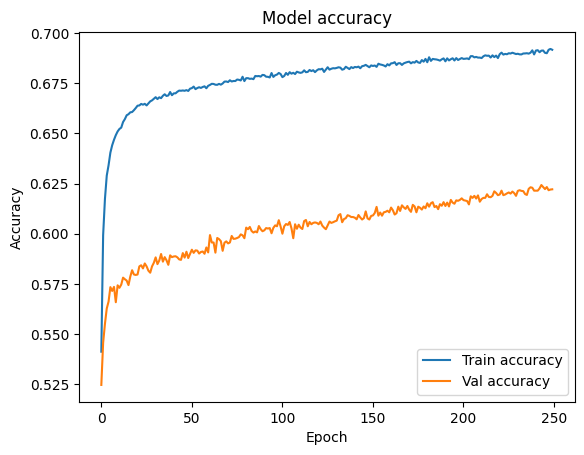

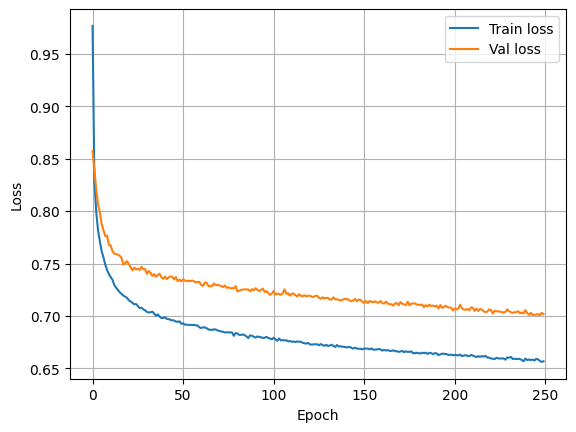

In [22]:
plt.plot(hist_AdaGrad.history['accuracy'])
plt.plot(hist_AdaGrad.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='lower right')
plt.show()
plt.plot(hist_AdaGrad.history['loss'], label='Train loss')
plt.plot(hist_AdaGrad.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

**RMSProp**

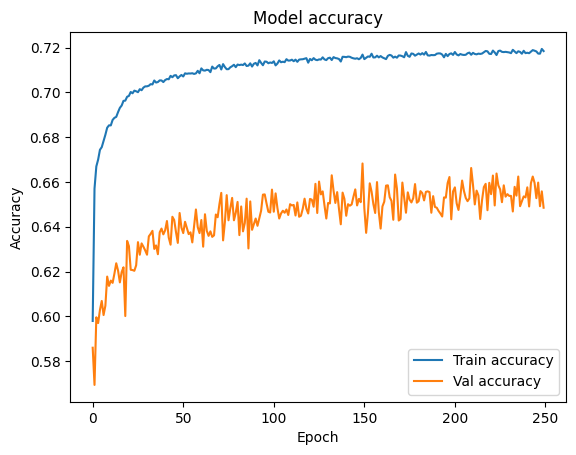

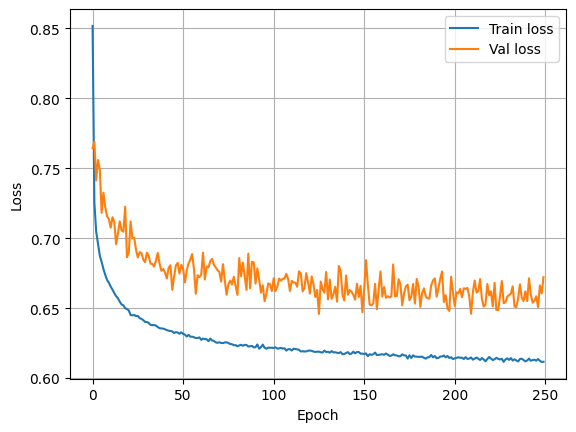

In [23]:
plt.plot(hist_RMS.history['accuracy'])
plt.plot(hist_RMS.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='lower right')
plt.show()
plt.plot(hist_RMS.history['loss'], label='Train loss')
plt.plot(hist_RMS.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [24]:
minority_class = dataset['Target'].value_counts().idxmin()
X_test_minority = X_test[y_test == minority_class]
y_test_minority = y_test[y_test == minority_class]
loss_ADA, accuracy_ADA = model_AdaGrad.evaluate(X_test_minority, y_test_minority)
loss_rms,accuracy_rms = model_RMS.evaluate(X_test_minority, y_test_minority)
print(f"loss adagrad: {loss_ADA} and rms loss: {loss_rms}")
print(f"accuracy: {accuracy_ADA} and rms accuracy: {accuracy_rms}")

112/112 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.9310
loss adagrad: 0.39659884572029114 and rms loss: 0.33826565742492676
accuracy: 0.9251605868339539 and rms accuracy: 0.9310248494148254
